In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler, QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [276]:
df = pd.read_csv("C:\\Users\\JAY\\Desktop\\Credit Card\\data_credit_card_customer_seg.csv")

In [277]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [278]:
df = df.round(2)

In [279]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [280]:
df['MINIMUM_PAYMENTS'].value_counts().head()

171.75    4
178.84    4
176.28    4
177.97    3
170.97    3
Name: MINIMUM_PAYMENTS, dtype: int64

In [281]:
print("Mean: "+str(round(df['MINIMUM_PAYMENTS'].mean(), 2)))
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(round(df['MINIMUM_PAYMENTS'].mean(), 2))

Mean: 864.21


In [282]:
df['CREDIT_LIMIT'].value_counts()

3000.00     784
1500.00     722
1200.00     621
1000.00     614
2500.00     612
           ... 
5550.00       1
7227.27       1
1250.00       1
10200.00      1
6250.00       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [283]:
print("Mean: "+str(round(df['CREDIT_LIMIT'].mean(), 2)))
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean(), 2))

Mean: 4494.45


In [284]:
df['TOTAL_TRX'] = df['PURCHASES_TRX'] + df['CASH_ADVANCE_TRX']
df['TOTAL_TRX'].describe()

count    8950.000000
mean       17.958659
std        25.338356
min         0.000000
25%         4.000000
50%        10.000000
75%        21.000000
max       358.000000
Name: TOTAL_TRX, dtype: float64

In [285]:
df = df.drop(['CUST_ID', 'PURCHASES_TRX', 'CASH_ADVANCE_TRX'], axis=1)
df.shape

(8950, 16)

In [286]:
df['TOTAL_TRX'].value_counts()

1      816
2      596
12     558
3      472
4      451
      ... 
274      1
242      1
186      1
170      1
199      1
Name: TOTAL_TRX, Length: 184, dtype: int64

In [287]:
def plot(data):
    for i,j in zip(df.columns, range(len(df.columns))):
#         print("{} {}".format(i, j))

        plt.figure(figsize=(15,5))

        # 121 for 1 row, 2 columns, 1st position
        plt.subplot(121)
        sns.kdeplot(df[i])
        plt.title(i+' before scaling')

        # 122 for 1 row, 2 columns, 2nd position
        plt.subplot(122)
        sns.kdeplot(data[j])
        plt.title(i+' after scaling')

#### Standard Scaler

In [288]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(scaled_data)

[[-0.73198974 -0.24214335 -0.42489974 ... -0.52466626  0.36067954
  -0.6298574 ]
 [ 0.78696211  0.13735402 -0.46955188 ...  0.22713151  0.36067954
  -0.55092127]
 [ 0.44713569  0.51685139 -0.10766823 ... -0.52466626  0.36067954
  -0.23517675]
 ...
 [-0.74039748 -0.19997698 -0.40196519 ...  0.32964939 -4.12276757
  -0.51145321]
 [-0.74517307 -0.19997698 -0.46955188 ...  0.32964939 -4.12276757
  -0.6298574 ]
 [-0.57257419 -0.87463897  0.04214581 ... -0.52466626 -4.12276757
   0.2779081 ]]


In [289]:
# plot(scaled_data)

In [290]:
scaled_data = normalize(scaled_data)
scaled_data

array([[-0.31489727, -0.10416851, -0.18278913, ..., -0.22570805,
         0.15516202, -0.2709606 ],
       [ 0.22049158,  0.03848394, -0.13155937, ...,  0.06363786,
         0.10105544, -0.1543575 ],
       [ 0.12768502,  0.14759318, -0.03074597, ..., -0.14982481,
         0.10299642, -0.06715757],
       ...,
       [-0.15739475, -0.04251139, -0.08545034, ...,  0.07007734,
        -0.87642382, -0.10872545],
       [-0.15425479, -0.0413963 , -0.09719974, ...,  0.06823918,
        -0.85343483, -0.13038384],
       [-0.11540392, -0.17628592,  0.0084946 , ..., -0.10574794,
        -0.83095527,  0.05601315]])

In [291]:
# plot(scaled_data)

## KMeans

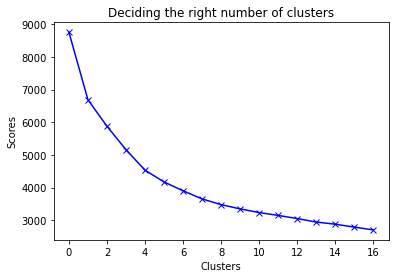

In [292]:
wcss = []

for i in range(1, 18):    
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_) 

plt.plot(wcss, 'bx-')
plt.title('Deciding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

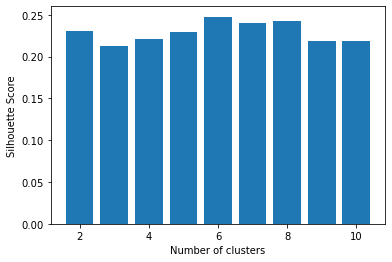

In [293]:
silhouette_scores = []

for n_cluster in range(2, 11):
    silhouette_scores.append(silhouette_score(scaled_data, KMeans(n_clusters = n_cluster).fit_predict(scaled_data))) 

plt.bar(range(2, 11), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

#### For n_clusters = 4

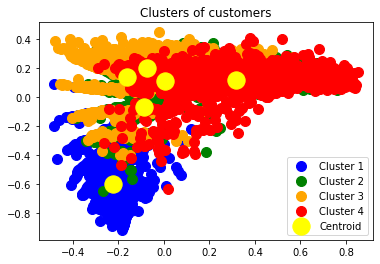

In [294]:
kmean = KMeans(4)
kmean.fit(scaled_data)
# labels = kmean.labels_

kmeans = KMeans(n_clusters=6, init='k-means++')
y_predict= kmeans.fit_predict(scaled_data)

plt.scatter(scaled_data[y_predict == 0, 0], scaled_data[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(scaled_data[y_predict == 1, 0], scaled_data[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_data[y_predict == 2, 0], scaled_data[y_predict == 2, 1], s = 100, c = 'orange', label = 'Cluster 3')
plt.scatter(scaled_data[y_predict == 3, 0], scaled_data[y_predict == 3, 1], s = 100, c = 'red', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [295]:
kmeans = KMeans(4, random_state=100)
kmeans.fit(scaled_data)
labels = kmeans.labels_

pca = PCA(n_components=2)
principal = pca.fit_transform(scaled_data)
principal

array([[-0.55778944, -0.62192077],
       [-0.47708588,  0.58251435],
       [ 0.32923121,  0.30547658],
       ...,
       [ 0.17772195, -0.29224041],
       [-0.31593683, -0.17169932],
       [ 0.0234107 ,  0.09529692]])

In [296]:
pca_df = pd.DataFrame(data = principal, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.557789,-0.621921
1,-0.477086,0.582514
2,0.329231,0.305477
3,-0.507318,-0.014103
4,-0.625716,-0.400140


In [297]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.557789,-0.621921,2
1,-0.477086,0.582514,1
2,0.329231,0.305477,3
3,-0.507318,-0.014103,2
4,-0.625716,-0.400140,1


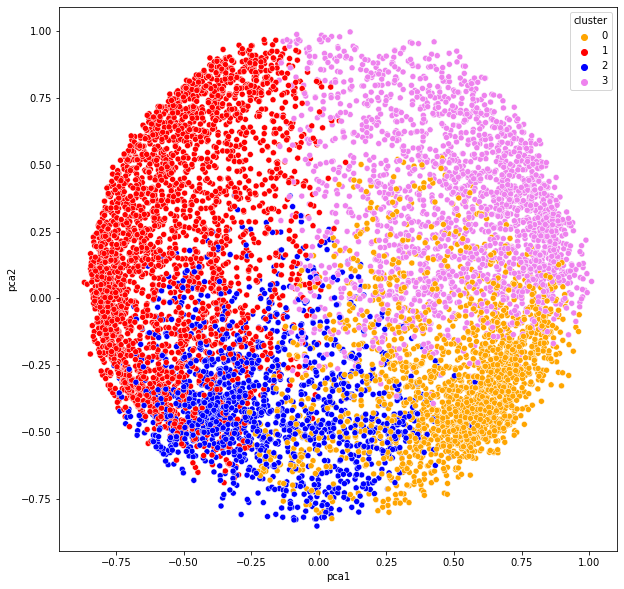

In [298]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['orange','red', 'blue','violet'])
# ,'blue','pink','yellow','gray'
plt.show()

In [299]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters['cluster'].value_counts()

1    3261
3    2139
0    2058
2    1492
Name: cluster, dtype: int64

In [300]:
clusters.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_TRX
cluster,,,,,,,,,,,,,,,,
0,630.568008,0.957177,757.154067,122.045175,635.688717,181.357901,0.869436,0.064728,0.817055,0.039271,2948.415151,878.691798,619.156463,0.254067,11.468902,17.395530
1,2232.462171,0.973306,175.820264,145.953226,30.034946,1708.455780,0.106317,0.066881,0.038804,0.245615,4122.959589,1448.885379,1047.531895,0.021107,11.479914,7.677400
2,139.549417,0.417346,351.649062,217.942185,133.905804,347.272922,0.270154,0.081294,0.180288,0.040335,3731.490543,1132.783177,271.128539,0.221381,11.317694,5.097185
3,2438.557204,0.975437,2955.797059,1986.920192,969.180281,1074.453623,0.864128,0.625002,0.554334,0.124123,7080.471758,3407.368990,1234.175110,0.211374,11.760168,43.145863


Text(0.5, 0, 'CLUSTERS')

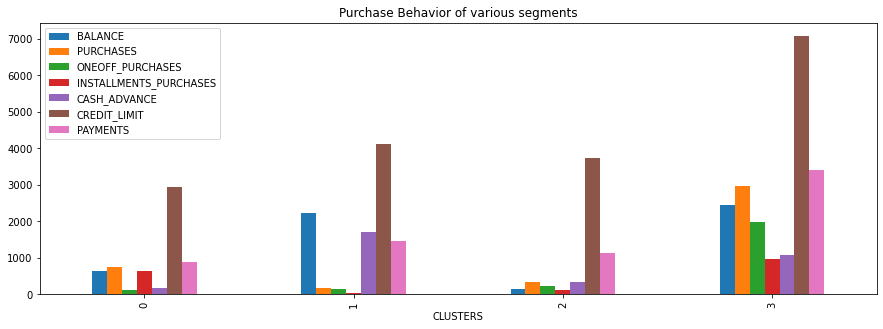

In [301]:
(clusters[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
           'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS', 'cluster']]
 .groupby('cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Purchase Behavior of various segments')
plt.xlabel('CLUSTERS')

INSIGHTS

Cluster 0 (Gold): Customers of cluster 0 have a pretty good credit limit and balance but these customers have a very low oneoff purchase and purchases in comparison to cash advance. This means they take more cash advance and spend less through purchasing. These customers should be given schemes accordingly to increase their purchase which will indirectly increase oneoff purchase and installment purchases.

Cluster 1 (Silver): Credit limit of customers of cluster 1 is lowest amongst all. These customers have a low balance but they have quite high purchase and installment purchases. These customers have a very low oneoff purchase and cash advance.

Cluster 2 (Bronze): These customers have a good credit limit but their balance, oneoff urchase, purchases, installment purchases is very low. So these customers should be encouraged by giving schemes to spend more and to increase the balance by keeping a minimum balance

Cluster 3 (Platinum): These customers have the highest credit limit and oneoff purchase followed by purchases and installment purchases. They have highest payment of all clusters. These customers should be encouraged to keep decent balance in their account by keeping a minimum balance rule

In [302]:
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOTAL_TRX,cluster
0,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,1000.0,201.80,139.51,0.00,12,2,2
1,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,7000.0,4103.03,1072.34,0.22,12,4,1
2,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,7500.0,622.07,627.28,0.00,12,12,3
3,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,7500.0,0.00,864.21,0.00,12,2,2
4,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,1200.0,678.33,244.79,0.00,12,1,1


In [303]:
X = clusters.drop(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 
                   'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE', 'TOTAL_TRX', 'cluster'], 
                  axis=1)
X.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.90,95.40,0.00,1000.0,201.80,139.51,0.00
1,3202.47,0.00,6442.95,7000.0,4103.03,1072.34,0.22
2,2495.15,773.17,0.00,7500.0,622.07,627.28,0.00
3,1666.67,1499.00,205.79,7500.0,0.00,864.21,0.00
4,817.71,16.00,0.00,1200.0,678.33,244.79,0.00


In [304]:
y = clusters['cluster']
y.head()

0    2
1    1
2    3
3    2
4    1
Name: cluster, dtype: int32

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
accuracy=clf.score(X_train, y_train)
print(accuracy*100)

79.60095770151636


In [306]:
X_test.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
7216,1854.03,1013.50,1243.09,2000.0,654.47,1524.38,0.00
1143,4613.57,0.00,1728.34,6000.0,922.22,1460.64,0.00
4925,129.84,1433.99,0.00,4000.0,1363.13,141.65,0.88
5948,2583.25,1337.35,2484.59,3000.0,819.79,6404.86,0.00
349,21.58,284.72,0.00,5000.0,344.16,155.79,0.80


In [307]:
example = np.array([[129.84,1433.99,0.00,4000.0,1363.13,141.65,0.88]])
prediction=clf.predict(example)
print(prediction)

[3]


In [308]:
filename = 'Model_Jay.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [309]:
loaded_model = pickle.load(open(filename, 'rb'))

In [310]:
prediction=loaded_model.predict(example)
print(prediction)

[3]


In [311]:
import struct
struct.calcsize("P")*8

64